In [1]:
import numpy as np
import numpy.polynomial.laguerre as geek
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [2]:
#T given k

k= 10
t= (k/2650.89)**.25
print(t)

0.24782897078275284


In [3]:
#k given t

t= 2
k= 2650.89*t**4
print(k)

42414.24


In [4]:
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .5                   # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+4)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)
p[-3]= T
p[-4]= cT

In [5]:
def pepe(T):
    output= (7/8)*((np.pi**2)/30)*4*T**4
    return output

In [6]:
def weight(x, T):
    u= .510998/T
    g= ((np.sqrt(x**2+u**2)*x**2*np.exp(x))/(np.exp(np.sqrt(x**2+u**2))+1))
    return g

    
      
def g(w,x, T):
    summ= 0
    for i in range(40):
        summ= summ+ w[i]*weight(x[i], T)
    return summ


def VT_function(ym, Eval, T):
    u= .510998/T
    x, w= geek.laggauss(40)

    
    pepe= (4*T**4)/ (2*np.pi**2)* g(w,x, T)
    v= np.zeros(3)
    mw= 80433
    mz= 91187.6
    constant1= (16*np.sqrt(2)*Gf)/(3*mw**2)
    constant2= (8*np.sqrt(2)*Gf)/(3*mz**2)
    yx= Eval[:]**3*ym[:,0]*ym[:,1]
    yy= Eval[:]**3*ym[:,0]*ym[:,2]
    yz= Eval[:]**3*ym[:,0]*ym[:,3]
    x_integral= np.trapz(yx , Eval)
    y_integral= np.trapz(yy , Eval)
    z_integral= np.trapz(yz , Eval)
    v[0]= constant2*x_integral
    v[1]= constant2*y_integral
    v[2]= constant2*z_integral + constant1*pepe
    
    return -v

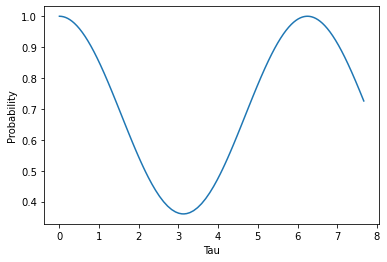

CPU times: user 33.2 s, sys: 467 ms, total: 33.7 s
Wall time: 34.7 s


In [7]:
%%time

t0= 0
y0= der.array_maker(ym0)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(y0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

prob_ve= der.probability(ym0, Eval, t, y)
tau= (dm2/(2*2.2*T))*t

plt.figure()
plt.plot(tau, prob_ve)
plt.xlabel("Tau")
plt.ylabel("Probability")
plt.show()




In [8]:
#ADDING ANTI-NEUTRINOS

In [9]:
N=100
Emax= 10
dm2= 2.5*10**-15
th= .5*np.arcsin(.8)
T= .5                   # T= (k/2650.89)^.25
cT= 0

Eval= np.linspace(Emax/N, Emax, N)


ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]
    
    
p= np.zeros(N+5)
p[:N]= np.linspace(Emax/N, Emax, N)
p[-1]= dm2
p[-2]= th
p[-3]= T
p[-4]= cT
p[-5]= 0
#p[-5]= -1

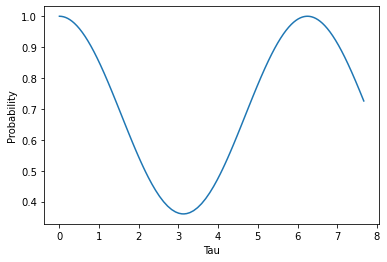

CPU times: user 8.42 s, sys: 109 ms, total: 8.53 s
Wall time: 8.65 s


In [15]:
%%time

t0= 0
y0= der.array_maker(ym0)
t0= 0
dt0=  0.01/np.max(np.abs(der.f(y0,y0,p)))
N_step = 100              
dN = 100
tau_final=10
t_final = tau_final*2*2.2*T/dm2


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

prob_ve= der.probability(ym0, Eval, t, y)
tau= (dm2/(2*2.2*T))*t

plt.figure()
plt.plot(tau, prob_ve)
plt.xlabel("Tau")
plt.ylabel("Probability")
plt.show()

In [16]:
def matrix_maker(y):
    length= len(y)
    matrix = np.zeros((length//4,4))
    
    for i in range(matrix.shape[0]):
        for j in range(4):
            matrix[i,j]= y[4*i+j]
    return matrix



def array_maker(M):
    length= M.shape[0]
    array = np.zeros(length*4)
    
    for i in range(M.shape[0]):
        for j in range(4):
            array[4*i+j] = M[i,j]
    return array

In [21]:
def newmatrix_maker(y):
    N= len(y)// 2
    Mv= matrix_maker(y[:N])
    Mv_= matrix_maker(y[N:])
    return Mv, Mv_


def newarray_maker(Mv, Mvbar):
    N= Mv.shape[0]
    array= np.zeros(8*N)
    array[:4*N]= array_maker(Mv)
    array[4*N:]= array_maker(Mvbar)
    return array

In [22]:
test= np.arange(40)
print(test)

test1, test2= newmatrix_maker(test)
print(test1)
print(test2)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]
 [16. 17. 18. 19.]]
[[20. 21. 22. 23.]
 [24. 25. 26. 27.]
 [28. 29. 30. 31.]
 [32. 33. 34. 35.]
 [36. 37. 38. 39.]]


In [23]:
newarray_maker(test1, test2)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39.])